In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from statistics import mean
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree

pd.set_option("display.max_columns", None)

In [13]:
df = pd.read_csv("C:/Users/Vivek Goli/DataSciencePractice/Datasets/modified_data.csv")
print(df.head())

   Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I   Q3E  Q4A  Q4I   Q4E  Q5A  Q5I  \
0    3   28  3890    3   25  2122    1   16  1944    3    8  2044    3   34   
1    3    2  8118    0   36  2890    1   35  4777    2   28  3090    3   10   
2    2    7  5784    0   33  4373    3   41  3242    0   13  6470    3   11   
3    1   23  5081    2   11  6837    1   37  5521    0   27  4556    2   28   
4    1   36  3215    1   13  7731    2    5  4156    3   10  2802    3    2   

    Q5E  Q6A  Q6I   Q6E  Q7A  Q7I   Q7E  Q8A  Q8I   Q8E  Q9A  Q9I   Q9E  Q10A  \
0  2153    3   33  2416    3   10  2818    3   13  2259    1   21  5541     0   
1  5078    3   40  2790    2   18  3408    3    1  8342    2   37   916     1   
2  3927    2    9  3704    0   17  4550    2    5  3021    1   32  5864     3   
3  3269    2   26  3231    3    2  7138    1   19  3079    2   31  9650     2   
4  5628    1    9  6522    3   34  2374    3   11  3054    3    7  2975     2   

   Q10I  Q10E  Q11A  Q11I  Q11E  Q12A 

In [14]:
print('dataset-shape  : ', df.shape)

dataset-shape  :  (39775, 176)


In [15]:
# build list of removable features to deleted from dataset
# Data cleaning
removables = [f'Q{i}E' for i in range(1, 43)] # add feature 'Q1E' to 'Q42E' to be removed
removables.extend([f'Q{i}I' for i in range(1, 43)]) # add feature 'Q1E' to 'Q42E' to be removed
removables.extend([f'VCL{i}' for i in range(1, 17)]) # add feature 'VCL1' to 'VCL16' to be removed
removables.extend([ 'source', 'introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand', 'orientation','voted', 'country', 'screensize', 'uniquenetworklocation', 'major', 'engnat', 'religion', 'race', 'voted'])

# remove features from the dataset
data = df.drop(removables, axis=1)
print(data.head())

   Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  Q11A  Q12A  Q13A  Q14A  \
0    3    3    1    3    3    3    3    3    1     0     3     3     3     3   
1    3    0    1    2    3    3    2    3    2     1     1     1     3     3   
2    2    0    3    0    3    2    0    2    1     3     1     0     3     0   
3    1    2    1    0    2    2    3    1    2     2     1     0     0     3   
4    1    1    2    3    3    1    3    3    3     2     1     3     3     3   

   Q15A  Q16A  Q17A  Q18A  Q19A  Q20A  Q21A  Q22A  Q23A  Q24A  Q25A  Q26A  \
0     3     3     2     3     2     2     0     3     3     3     3     3   
1     2     2     3     1     0     0     1     2     0     1     1     2   
2     3     3     3     1     1     0     3     2     1     3     1     0   
3     1     1     2     0     0     1     0     0     0     0     0     1   
4     3     2     3     3     3     3     2     2     3     1     3     3   

   Q27A  Q28A  Q29A  Q30A  Q31A  Q32A  Q33A  Q34A  Q35A 

In [16]:
print('checking for null values')
data.isnull().sum()

checking for null values


Q1A                 0
Q2A                 0
Q3A                 0
Q4A                 0
Q5A                 0
                   ..
familysize          0
mental_state        0
stress_state        0
anxiety_state       0
depression_state    0
Length: 62, dtype: int64

In [17]:
data.to_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/cleaned_data.csv', index = False)

In [18]:
#DASS question numbers regarding to each type
stress = [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]
depression = [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42] 
anxiety = [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41]

stress_ques = [f'Q{i}A' for i in stress]
stress_ques.extend(data.columns[42:58])
stress_ques.append('stress_state')
#creating a seperate data frame for stress related data
stress_df = data[stress_ques]
print('stress data : \n', stress_df.head())

depression_ques = [f'Q{i}A' for i in depression]
depression_ques.extend(data.columns[42:58])
depression_ques.append('depression_state')
#creating a seperate data frame for depression related data
depression_df = data[depression_ques]
print('\ndepression data : \n', depression_df.head())

anxiety_ques = [f'Q{i}A' for i in anxiety]
anxiety_ques.extend(data.columns[42:58])
anxiety_ques.append('anxiety_state')
#creating a seperate data frame for anxiety related data
anxiety_df = data[anxiety_ques]
print('\nanxiety data : \n', anxiety_df.head())

stress data : 
    Q1A  Q6A  Q8A  Q11A  Q12A  Q14A  Q18A  Q22A  Q27A  Q29A  Q32A  Q33A  Q35A  \
0    3    3    3     3     3     3     3     3     3     3     3     1     3   
1    3    3    3     1     1     3     1     2     2     2     2     2     1   
2    2    2    2     1     0     0     1     2     1     1     2     0     2   
3    1    2    1     1     0     3     0     0     3     2     0     1     0   
4    1    1    3     1     3     3     3     2     1     1     3     3     2   

   Q39A  TIPI1  TIPI2  TIPI3  TIPI4  TIPI5  TIPI6  TIPI7  TIPI8  TIPI9  \
0     3      1      5      7      7      7      7      7      5      1   
1     1      6      5      4      7      5      4      7      7      1   
2     1      2      5      2      2      5      6      5      5      3   
3     2      1      1      7      4      6      4      6      1      6   
4     2      2      5      3      6      5      5      5      6      3   

   TIPI10  education  urban  gender  age  married  familys

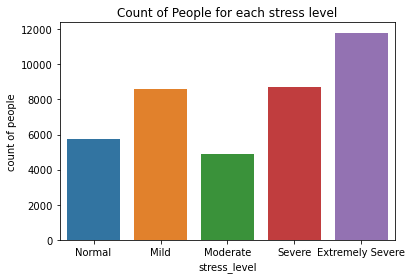

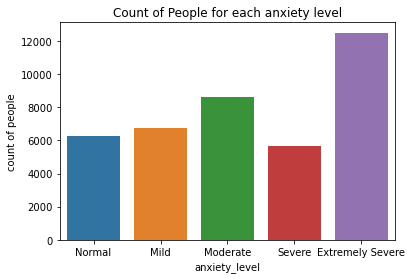

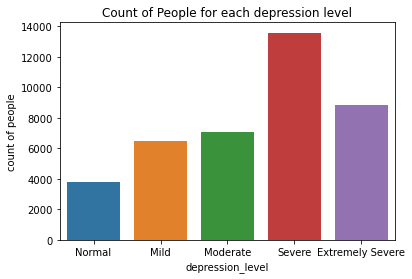

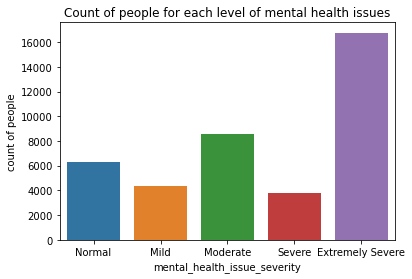

In [35]:
ind = np.arange(5)
labels = ['Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe']

plt.figure()
sns.barplot(x = stress_df['stress_state'].unique(), y = stress_df['stress_state'].value_counts())
plt.title('Count of People for each stress level')
plt.xticks(ind, labels)
plt.xlabel('stress_level')
plt.ylabel('count of people')
plt.show()

plt.figure()
sns.barplot(x = anxiety_df['anxiety_state'].unique(), y = anxiety_df['anxiety_state'].value_counts())
plt.title('Count of People for each anxiety level')
plt.xticks(ind, labels)
plt.xlabel('anxiety_level')
plt.ylabel('count of people')
plt.show()

plt.figure()
sns.barplot(x = depression_df['depression_state'].unique(), y = depression_df['depression_state'].value_counts())
plt.title('Count of People for each depression level')
plt.xticks(ind, labels)
plt.xlabel('depression_level')
plt.ylabel('count of people')
plt.show()

plt.figure()
sns.barplot(x = data['mental_state'].unique(), y = data['mental_state'].value_counts())
plt.title('Count of people for each level of mental health issues')
plt.xticks(ind, labels)
plt.xlabel('mental_health_issue_severity')
plt.ylabel('count of people')
plt.show()

In [21]:
stress_df.to_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/stress_data.csv', index = False)
depression_df.to_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/depression_data.csv', index = False)
anxiety_df.to_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/anxiety_data.csv', index = False)

In [22]:
def visualization(y_test, pred):
    cf = confusion_matrix(y_test, pred)
    print(f'Confusion matrix :')
    print(cf)
    print(f"Accuracy : {accuracy_score(y_test, pred)}")
    print(f"Presision : {precision_score(y_test, pred, average = 'weighted')}")
    print(f"f1 score : {f1_score(y_test, pred, average = 'weighted')}")

def data_reduction(data):
    pca = PCA(n_components = 1)
    
    if len(data.columns) == 59:
        component1 = pca.fit_transform(data.iloc[:, 0:42])  #DASS questions attributes
        component2 = pca.fit_transform(data.iloc[:, 42:52]) #personality attributes

        q_df = pd.DataFrame(data = component1, columns = ['Questions_score'])
        p_df = pd.DataFrame(data = component2, columns = ['Personality_score'])

        data = pd.concat([q_df, p_df, data.iloc[:, 52:]], axis = 1) 
    elif len(data.columns) == 31:
        component1 = pca.fit_transform(data.iloc[:, 0:14])  #DASS questions attributes
        component2 = pca.fit_transform(data.iloc[:, 14:24]) #personality attributes

        q_df = pd.DataFrame(data = component1, columns = ['Questions_score'])
        p_df = pd.DataFrame(data = component2, columns = ['Personality_score'])

        data = pd.concat([q_df, p_df, data.iloc[:, 24:]], axis = 1)
    return data

def score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

def Model(name, X_train, X_test, y_train, y_test, attr):
    
    model1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth = 5, min_samples_leaf = 5)
    model2 = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 5, min_samples_leaf = 5)
    model3 = GaussianNB()
    model4 = KNeighborsClassifier(n_neighbors= 60, metric = 'euclidean')
    
    print(f'\n\n{name}')
    if name == "decisionTree_entropy":
        model1.fit(X_train, y_train)
        pred = model1.predict(X_test)
        plt.figure(figsize=(25,10))
        a = plot_tree(model1, feature_names = attr, class_names = ['0', '1', '2', '3', '4'], filled=True, rounded=True, fontsize=8)
        plt.show()
    
    elif name == 'decisionTree_gini':
        model2.fit(X_train, y_train)
        pred = model2.predict(X_test)
        plt.figure(figsize=(25,10))
        a = plot_tree(model2, feature_names = attr, class_names = ['0', '1', '2', '3', '4'], filled=True, rounded=True, fontsize=8)
        plt.show()
    
    elif name == 'naiveBayes':
        model3.fit(X_train, y_train)
        pred = model3.predict(X_test)
    
    elif name == 'kNeighbours':
        model4.fit(X_train, y_train)
        pred = model4.predict(X_test)
    visualization(y_test, pred)

In [23]:
def Classification(issue, df):
    
    print(f'classification of {issue}\n')
    new_data = data_reduction(df)

    X = new_data.loc[:, new_data.columns[:-1]]
    y = new_data.loc[:, new_data.columns[-1]]

    scaler = MinMaxScaler(feature_range=(0,1),copy=True,clip=False)

    X = scaler.fit_transform(X)
    y = y.to_numpy()

    dic = {"decisionTree_entropy":[], "decisionTree_gini":[], "naiveBayes":[], "kNeighbours":[]}
    mean_accuracies = []

    fold = StratifiedKFold(n_splits = 4)

    for train_index, test_index in fold.split(X,y):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        dic["decisionTree_entropy"].append(score(DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth = 5, min_samples_leaf = 5), X_train, X_test, y_train, y_test))
        dic["decisionTree_gini"].append(score(DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 5, min_samples_leaf = 5), X_train, X_test, y_train, y_test))
        dic["naiveBayes"].append(score(GaussianNB(), X_train, X_test, y_train, y_test))
        dic["kNeighbours"].append(score(KNeighborsClassifier(n_neighbors=60, metric = 'euclidean'), X_train, X_test, y_train, y_test))

    for key, value in dic.items():
        print(f'{key} accuracies : {value}')
        print(f'mean accuracy : {mean(value)}\n')
        dic[key] = mean(value)
        
    best=list(dic.keys())[list(dic.values()).index(max(dic.values()))]
    print(f"Best classification method is {best}")
    print('accuracy : ', max(dic[i] for i in dic)*100)
    print()
    
    for name in dic.keys():
        attributes = new_data.columns[:-1]
        label = new_data.columns[-1]
        x = new_data.loc[:, attributes] #values
        y = new_data.loc[:, label] #labels
    
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 1)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
    
        Model(name, X_train, X_test, y_train, y_test, attributes)

In [24]:
df = pd.read_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/cleaned_data.csv')
df1 = pd.read_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/stress_data.csv')
df2 = pd.read_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/anxiety_data.csv')
df3 = pd.read_csv('C:/Users/Vivek Goli/DataSciencePractice/MentalHealthProject/depression_data.csv')

df = df.drop(['stress_state', 'depression_state', 'anxiety_state'], axis=1)

In [25]:
df.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,married,familysize,mental_state
0,3,3,1,3,3,3,3,3,1,0,3,3,3,3,3,3,2,3,2,2,0,3,3,3,3,3,3,2,3,1,3,3,1,2,3,3,0,1,3,2,3,3,1,5,7,7,7,7,7,5,1,1,2,3,2,16,1,2,4
1,3,0,1,2,3,3,2,3,2,1,1,1,3,3,2,2,3,1,0,0,1,2,0,1,1,2,2,3,2,2,1,2,2,1,1,2,3,1,1,0,1,1,6,5,4,7,5,4,7,7,1,5,2,3,2,16,1,4,2
2,2,0,3,0,3,2,0,2,1,3,1,0,3,0,3,3,3,1,1,0,3,2,1,3,1,0,1,0,1,1,3,2,0,3,2,3,3,3,1,1,0,3,2,5,2,2,5,6,5,5,3,2,2,3,2,17,1,3,2
3,1,2,1,0,2,2,3,1,2,2,1,0,0,3,1,1,2,0,0,1,0,0,0,0,0,1,3,0,2,2,2,0,1,3,0,0,1,0,2,3,3,1,1,1,7,4,6,4,6,1,6,1,1,3,2,13,1,5,0
4,1,1,2,3,3,1,3,3,3,2,1,3,3,3,3,2,3,3,3,3,2,2,3,1,3,3,1,3,1,3,2,3,3,3,2,3,2,2,2,3,3,2,2,5,3,6,5,5,5,6,3,3,3,2,2,19,1,4,4


In [26]:
df1.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,married,familysize,stress_state
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,1,5,7,7,7,7,7,5,1,1,2,3,2,16,1,2,4
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,6,5,4,7,5,4,7,7,1,5,2,3,2,16,1,4,3
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,2,5,2,2,5,6,5,5,3,2,2,3,2,17,1,3,1
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,1,5,1
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,2,5,3,6,5,5,5,6,3,3,3,2,2,19,1,4,3


In [27]:
df2.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,married,familysize,anxiety_state
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,1,5,7,7,7,7,7,5,1,1,2,3,2,16,1,2,4
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,6,5,4,7,5,4,7,7,1,5,2,3,2,16,1,4,2
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,2,5,2,2,5,6,5,5,3,2,2,3,2,17,1,3,1
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,1,1,7,4,6,4,6,1,6,1,1,3,2,13,1,5,2
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,1,4,4


In [28]:
df3.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,married,familysize,depression_state
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,1,5,7,7,7,7,7,5,1,1,2,3,2,16,1,2,3
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,6,5,4,7,5,4,7,7,1,5,2,3,2,16,1,4,3
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,2,5,2,2,5,6,5,5,3,2,2,3,2,17,1,3,4
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,1,1,7,4,6,4,6,1,6,1,1,3,2,13,1,5,2
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,2,5,3,6,5,5,5,6,3,3,3,2,2,19,1,4,4


classification of stress

decisionTree_entropy accuracies : [0.9957763475462591, 0.9968825422365245, 0.9968825422365245, 0.9973850950417379]
mean accuracy : 0.9967316317652615

decisionTree_gini accuracies : [0.995575221238938, 0.9973853580048271, 0.9964802896218825, 0.9976868148446143]
mean accuracy : 0.9967819209275655

naiveBayes accuracies : [0.9401649235720032, 0.9365446500402252, 0.9563555913113435, 0.9207482651111335]
mean accuracy : 0.9384533575086764

kNeighbours accuracies : [0.9335277554304103, 0.9325221238938053, 0.9347345132743363, 0.9227597304636428]
mean accuracy : 0.9308860307655487

Best classification method is decisionTree_gini
accuracy :  99.67819209275655



decisionTree_entropy


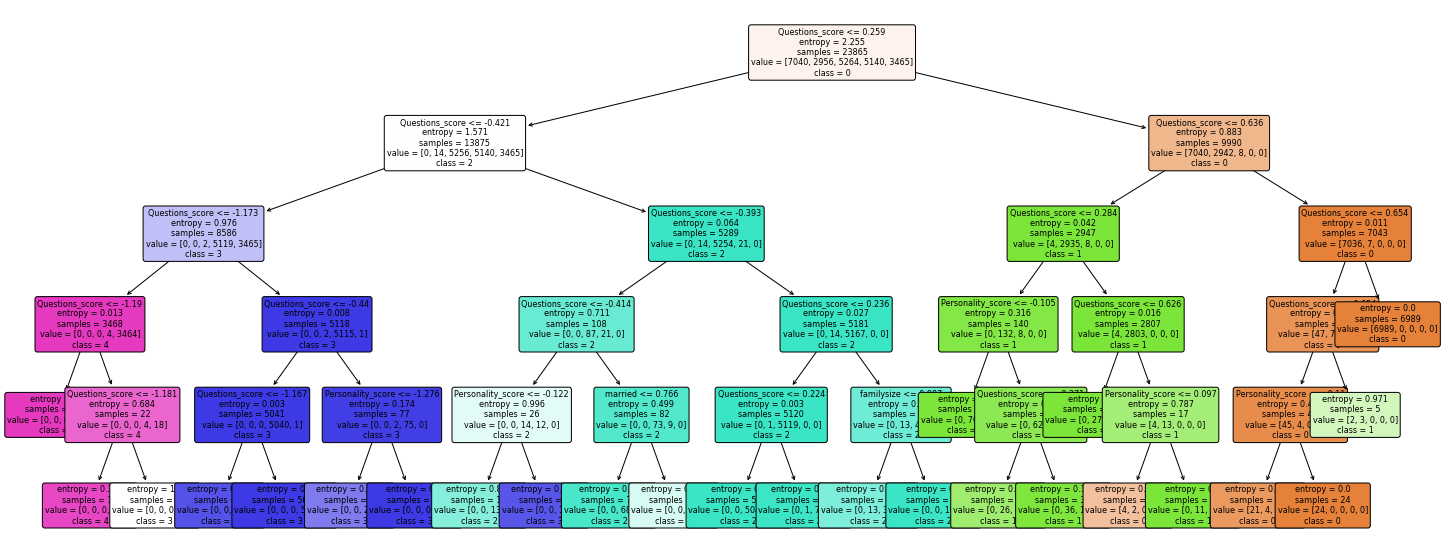

Confusion matrix :
[[4757    3    0    0    0]
 [   6 1946   13    0    0]
 [   0    1 3460    5    0]
 [   0    0   14 3419    2]
 [   0    0    0    0 2284]]
Accuracy : 0.9972344437460716
Presision : 0.9972420679167036
f1 score : 0.9972338648252017


decisionTree_gini


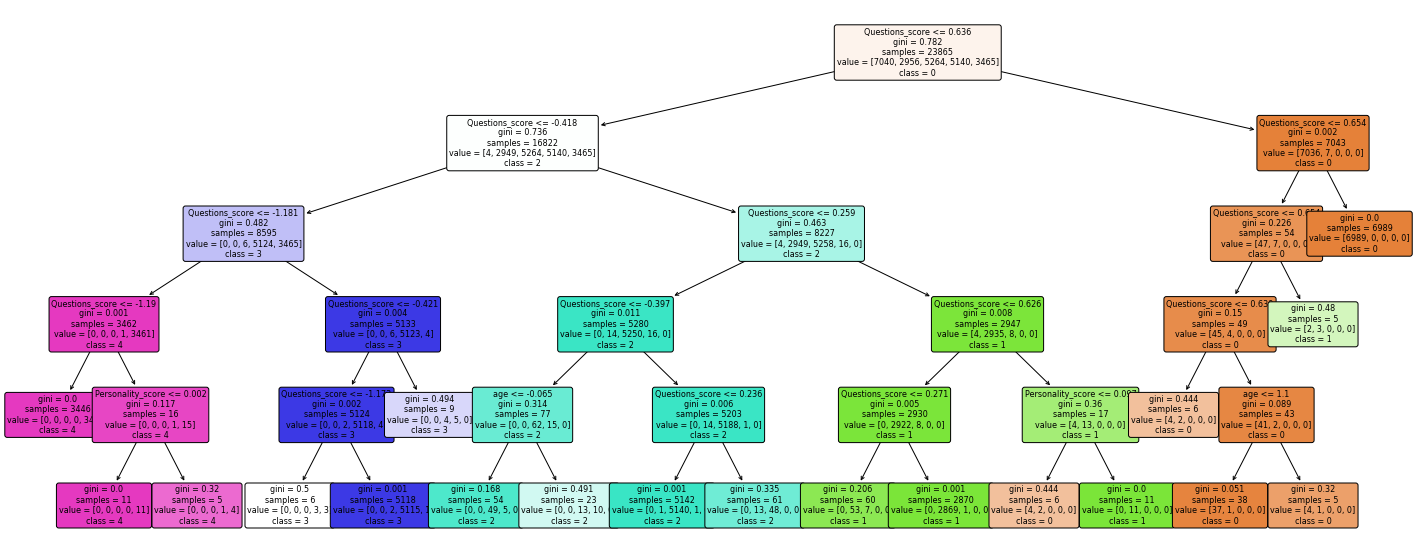

Confusion matrix :
[[4757    3    0    0    0]
 [   6 1946   13    0    0]
 [   0    1 3457    8    0]
 [   0    0   13 3420    2]
 [   0    0    0    0 2284]]
Accuracy : 0.9971087366436203
Presision : 0.9971140996682083
f1 score : 0.9971080374799265


naiveBayes
Confusion matrix :
[[4672   85    0    3    0]
 [ 151 1784   30    0    0]
 [  52   12 3338   64    0]
 [   0    0  346 2728  361]
 [   0    0    0   39 2245]]
Accuracy : 0.9281583909490886
Presision : 0.9311559073502148
f1 score : 0.9270021432294296


kNeighbours
Confusion matrix :
[[4633  104   23    0    0]
 [ 579  828  557    1    0]
 [  81   56 3130  199    0]
 [   7    0  431 2950   47]
 [   2    0    7  547 1728]]
Accuracy : 0.8340037712130736
Presision : 0.8413580907359399
f1 score : 0.8247230468424176


In [29]:
Classification('stress', df1)

classification of anxiety

decisionTree_entropy accuracies : [0.9730490748189863, 0.9716411906677394, 0.9720434432823813, 0.9718394850648697]
mean accuracy : 0.9721432984584941

decisionTree_gini accuracies : [0.9735518905872889, 0.9718423169750603, 0.9728479485116653, 0.9714371919943678]
mean accuracy : 0.9724198370170956

naiveBayes accuracies : [0.9136162510056315, 0.9348350764279968, 0.9477071600965407, 0.9158201749974857]
mean accuracy : 0.9279946656319137

kNeighbours accuracies : [0.9236725663716814, 0.9203539823008849, 0.9182421560740145, 0.9056622749673137]
mean accuracy : 0.9169827449284736

Best classification method is decisionTree_gini
accuracy :  97.24198370170956



decisionTree_entropy


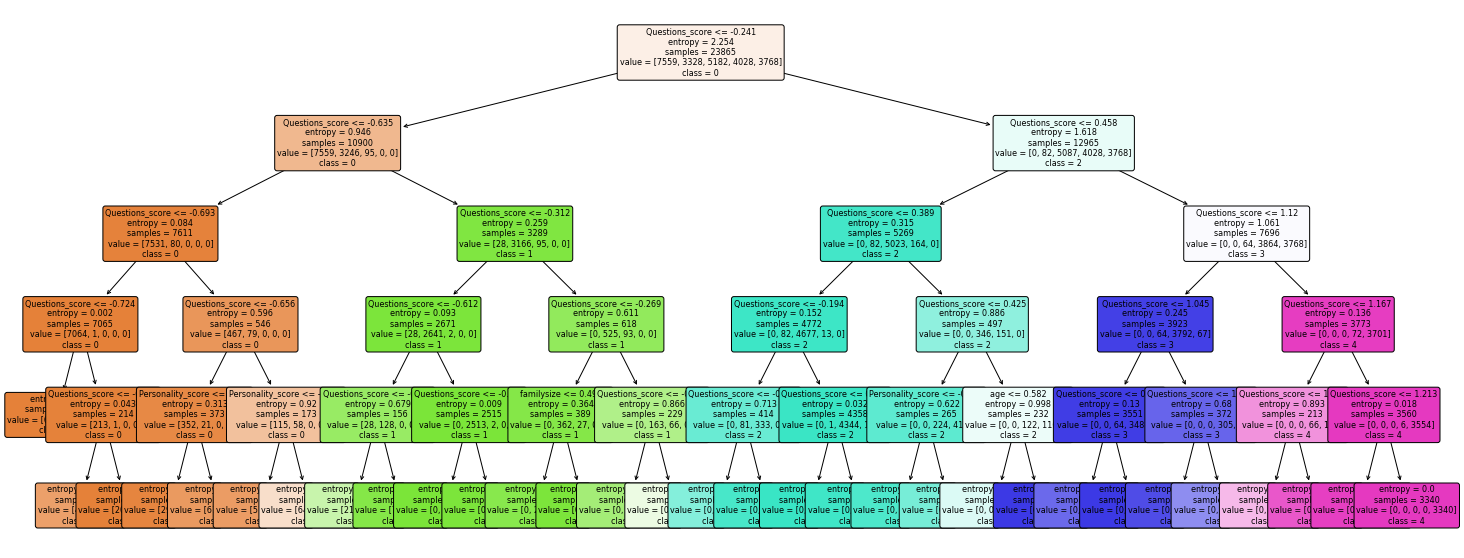

Confusion matrix :
[[4912   21    0    0    0]
 [  63 2257   42    0    0]
 [   0   64 3299   53    0]
 [   0    0   97 2552   45]
 [   0    0    0   37 2468]]
Accuracy : 0.9734758013827781
Presision : 0.9734171794065467
f1 score : 0.9734204846803407


decisionTree_gini


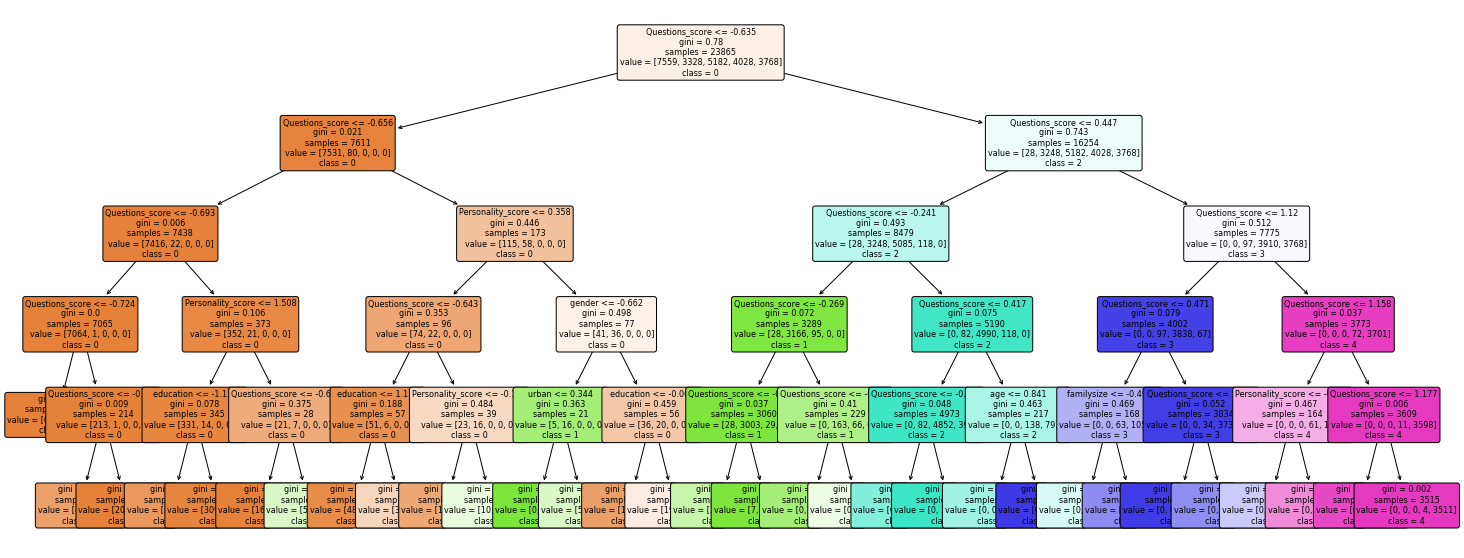

Confusion matrix :
[[4902   31    0    0    0]
 [  50 2270   42    0    0]
 [   0   64 3288   64    0]
 [   0    0   91 2568   35]
 [   0    0    0   55 2450]]
Accuracy : 0.9728472658705217
Presision : 0.9728419255424233
f1 score : 0.972840534510287


naiveBayes
Confusion matrix :
[[4784  146    0    3    0]
 [ 171 2119   72    0    0]
 [  59   81 3224   52    0]
 [   0    0  348 1905  441]
 [   0    0    0   55 2450]]
Accuracy : 0.91024512884978
Presision : 0.9134041861810509
f1 score : 0.9079542990394124


kNeighbours
Confusion matrix :
[[4822   97   14    0    0]
 [ 838 1016  508    0    0]
 [ 192  113 2993  118    0]
 [   3    2  584 2056   49]
 [   4    0   15  418 2068]]
Accuracy : 0.8142677561282212
Presision : 0.8223283446404057
f1 score : 0.8044009115818795


In [30]:
Classification('anxiety', df2)

classification of depression

decisionTree_entropy accuracies : [0.9770716009654062, 0.9780772325020113, 0.9797868061142397, 0.9794830534044051]
mean accuracy : 0.9786046732465156

decisionTree_gini accuracies : [0.9790828640386162, 0.9784794851166533, 0.9788817377312953, 0.9794830534044051]
mean accuracy : 0.9789817850727425

naiveBayes accuracies : [0.9412711182622687, 0.9362429605792437, 0.957059533386967, 0.946595594890878]
mean accuracy : 0.9452923017798394

kNeighbours accuracies : [0.9394609814963797, 0.9359412711182623, 0.9410699919549477, 0.9237654631398974]
mean accuracy : 0.9350594269273718

Best classification method is decisionTree_gini
accuracy :  97.89817850727425



decisionTree_entropy


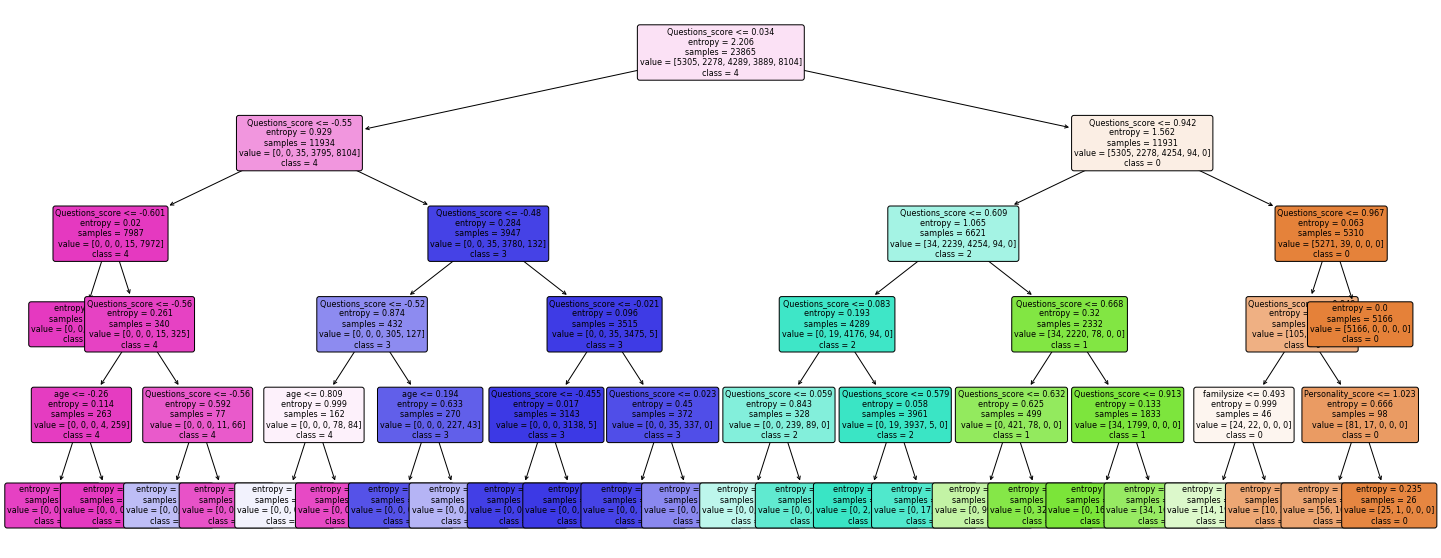

Confusion matrix :
[[3506   45    0    0    0]
 [  18 1463   27    0    0]
 [   0   57 2709   24    0]
 [   0    0   84 2482   22]
 [   0    0    0  100 5373]]
Accuracy : 0.9763042111879321
Presision : 0.9766371067454056
f1 score : 0.9764121445908409


decisionTree_gini


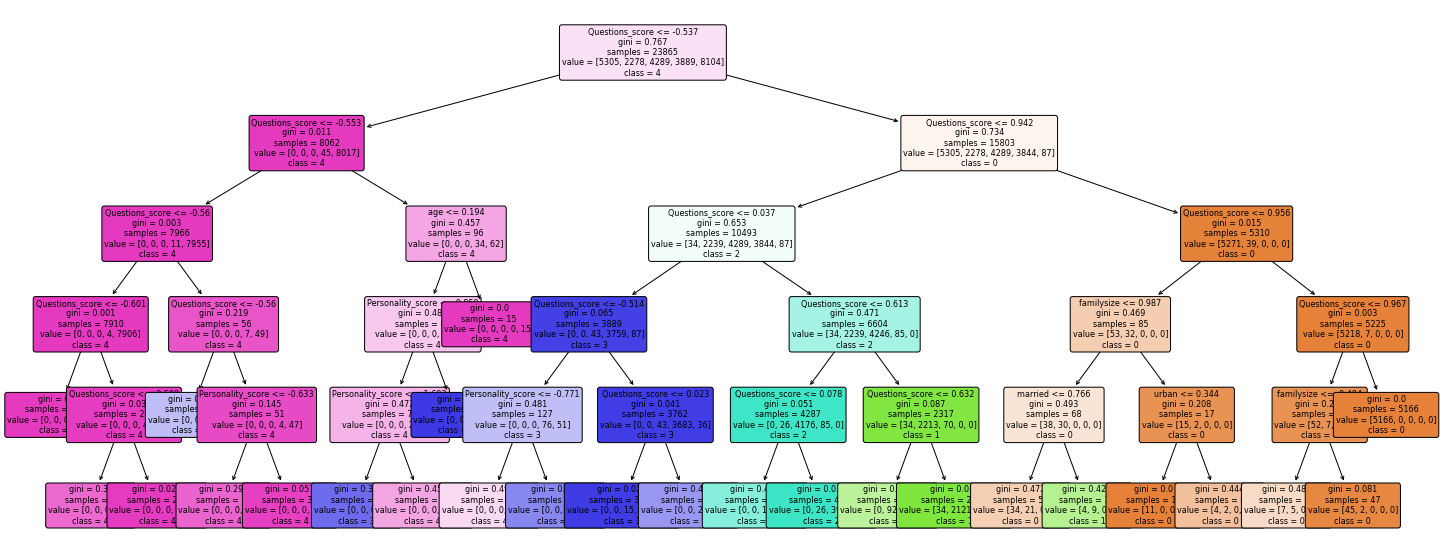

Confusion matrix :
[[3518   33    0    0    0]
 [  24 1450   34    0    0]
 [   0   52 2710   28    0]
 [   0    0   76 2460   52]
 [   0    0    0   67 5406]]
Accuracy : 0.9769956002514142
Presision : 0.9770731884924707
f1 score : 0.9770150332388116


naiveBayes
Confusion matrix :
[[3474   75    0    0    2]
 [  64 1378   66    0    0]
 [   4   63 2664   54    5]
 [   0    0   70 2443   75]
 [   0    0    0  281 5192]]
Accuracy : 0.952294154619736
Presision : 0.9536052346637103
f1 score : 0.95264827177822


kNeighbours
Confusion matrix :
[[3435   46   69    1    0]
 [ 550  387  566    5    0]
 [ 155   55 2375  187   18]
 [   6    2  380 1810  390]
 [   2    0    6  166 5299]]
Accuracy : 0.8363293526084223
Presision : 0.837473396115745
f1 score : 0.8204070336339958


In [31]:
Classification('depression', df3)

classification of mental_state

decisionTree_entropy accuracies : [0.9509251810136766, 0.9555510860820595, 0.9567578439259855, 0.9575580810620538]
mean accuracy : 0.9551980480209439

decisionTree_gini accuracies : [0.9521319388576026, 0.956053901850362, 0.9539420756234915, 0.9569546414563009]
mean accuracy : 0.9547706394469393

naiveBayes accuracies : [0.9057723250201126, 0.9003419147224457, 0.9156275140788415, 0.8994267323745349]
mean accuracy : 0.9052921215489836

kNeighbours accuracies : [0.9006436041834271, 0.9007441673370877, 0.9048672566371682, 0.8972141204867746]
mean accuracy : 0.9008672871611144

Best classification method is decisionTree_entropy
accuracy :  95.51980480209438



decisionTree_entropy


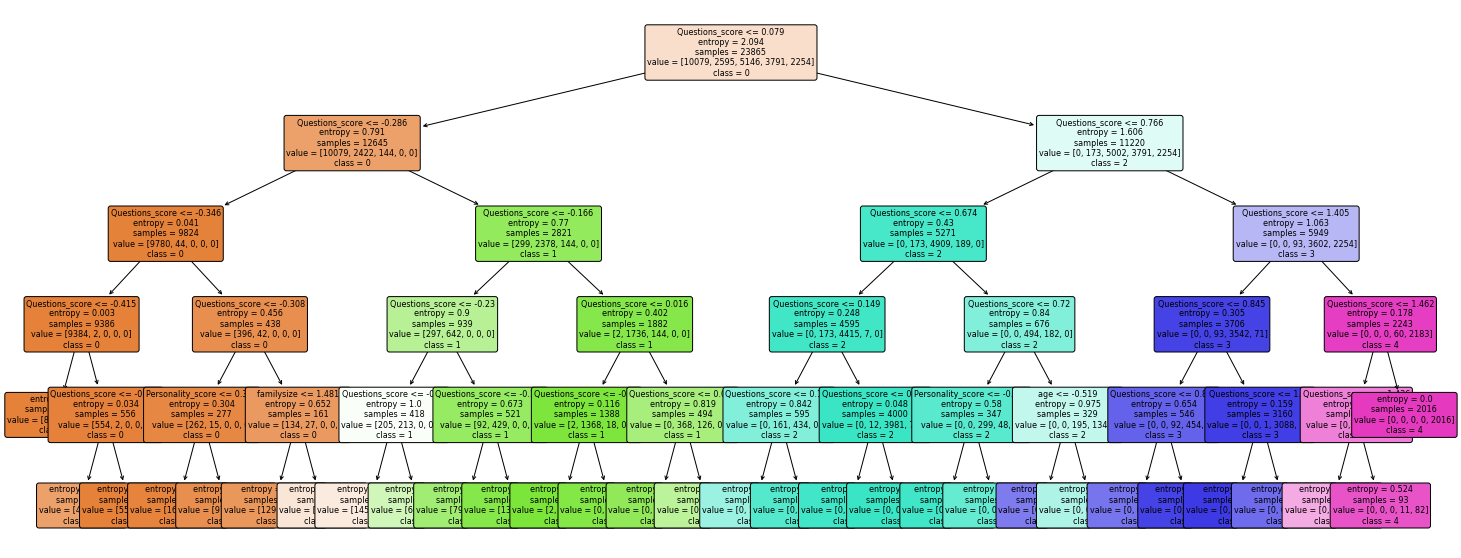

Confusion matrix :
[[6600   73    0    0    0]
 [ 114 1561  112    0    0]
 [   0   90 3230   71    0]
 [   0    0  129 2355   52]
 [   0    0    0   45 1478]]
Accuracy : 0.956882463859208
Presision : 0.956724121199368
f1 score : 0.9567142092849261


decisionTree_gini


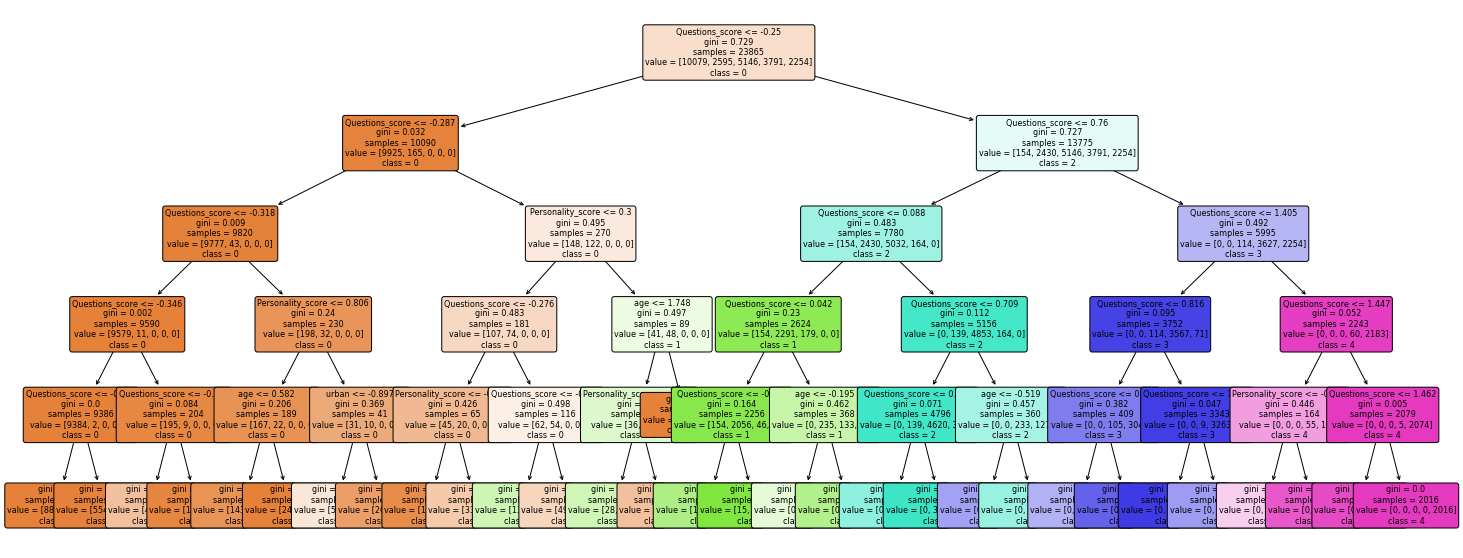

Confusion matrix :
[[6550  123    0    0    0]
 [  80 1617   90    0    0]
 [   0  125 3182   84    0]
 [   0    0  113 2371   52]
 [   0    0    0   45 1478]]
Accuracy : 0.9552482715273413
Presision : 0.9557431646773388
f1 score : 0.9554376952313834


naiveBayes
Confusion matrix :
[[6479  192    0    2    0]
 [ 189 1494  103    1    0]
 [  83  104 3150   54    0]
 [   1    0  380 1847  308]
 [   0    0    0   39 1484]]
Accuracy : 0.908485229415462
Presision : 0.9118038351572166
f1 score : 0.9069897380742135


kNeighbours
Confusion matrix :
[[6603   40   30    0    0]
 [ 749  470  568    0    0]
 [ 163   47 3080  101    0]
 [   9    0  649 1846   32]
 [   1    0   17  605  900]]
Accuracy : 0.8107479572595852
Presision : 0.8216660847436692
f1 score : 0.7907462990700314


In [32]:
Classification('mental_state', df)